# Dataset, DataLoader
데이터를 처리하여 model에 공급(fit)하기 위하여 파이토치에서 torch.utils.data.Dataset과 torch.utils.data.DataLoader 클래스를 지원합니다.

- Dataset : feature와 label을 저장할 수 있습니다.
    * data 의 모음
- DataLoader : Dataset을 모델에 공급할 수 있도록하는 클래스 입니다.
    * data 를 공급하는 역할

In [2]:
import torch

# torchvision : PyTorch 기반의 CV 도구들이 들어있는 패키지
# torchvision.datasets : CV 관련 예제 데이터 셋
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
train_data = datasets.FashionMNIST(
    root="../../data",  # 데이터를 저장할 디렉토리
    train=True,  #  훈련용 데이터 여부
    download=True,  # 다운로드
    transform=ToTensor(),  # 이미지 변환 (ndarray -> tensor)
)

# Dataset 시각화

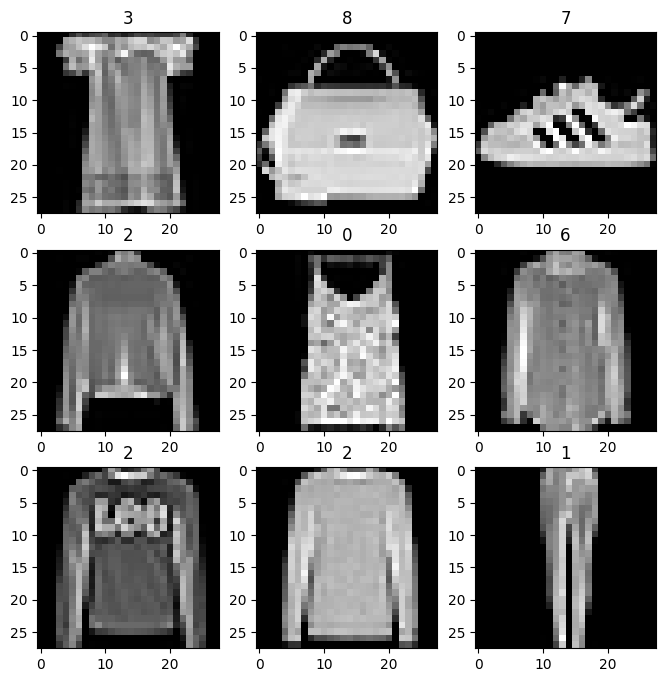

In [4]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()

    # Dataset 에서 데이터를 뽑을 예정. 이 때 Dataset 에는 feature, target 이 같이 들어있다
    feature, target = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)

    plt.title(target)
    plt.imshow(feature.squeeze(), cmap="gray")

plt.show()

# DataLoader 만들기

In [5]:
BATCH_SIZE = 64

In [6]:
from torch.utils.data import DataLoader

# shuffle : 1에폭 당 데이터 로더에서 데이터를 읽어 올 때 마다 랜덤하게 섞게 된다.
#   shuffle을 걸어주면 모델이 데이터를 조금 더 어렵게 학습한다.
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

In [7]:
# 테스트 데이터 불러오기
test_data = datasets.FashionMNIST(
    root="../../data", train=False, download=True, transform=ToTensor()
)

test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

## DataLoader 시각화
- DataLoader 객체는 파이썬의 Generator 자료구조에 해당하며, Iterator를 직접 움직여 가면서 데이터를 Iterate 할 수 있습니다.
- 이 때 설정한 BATCH_SIZE 만큼 데이터를 추출해 냅니다.

In [8]:
# dataloader의 Iterator가 한칸 움직일 때 마다(next) BATCH_SIZE만큼 데이터를 가져온다.
train_features, train_labels = next(iter(train_dataloader))
print(train_features.size())
print(train_labels.size())

torch.Size([64, 1, 28, 28])
torch.Size([64])
